In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns

import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(r'../MimicApp/datasets/sepsis1/core/admissions.csv')
print(len(df))
patients = pd.read_csv(r'../MimicApp/datasets/sepsis1/core/patients.csv')
print(len(patients))

7889
382278


In [3]:
print(df['deathtime'].isnull().sum() / len(df))
print(set(df['insurance'].to_list()))

0.6809481556597794
{'Medicare', 'Medicaid', 'Other'}


In [23]:
def strToDatetime(date):
    return datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
def getDifferenceDays(x, y):
    return (y - x).days

filtered_df= df[df['dischtime'].notna()].copy()
filtered_df["dischtime"] = filtered_df["dischtime"].map(strToDatetime)
filtered_df["admittime"] = filtered_df["admittime"].map(strToDatetime)
filtered_df["time"] = filtered_df.apply(lambda x: getDifferenceDays(x.admittime, x.dischtime), axis=1)
filtered_df = filtered_df[filtered_df['time'] < 175].copy()
px.violin(filtered_df, y="time", box=True)

In [31]:
fig = px.violin(filtered_df, x="ethnicity", y="time", box=True, points=False)
fig.show()

In [32]:
fig = px.violin(filtered_df, x="insurance", y="time", box=True, points=False)
fig.show()

<AxesSubplot: xlabel='time', ylabel='insurance'>

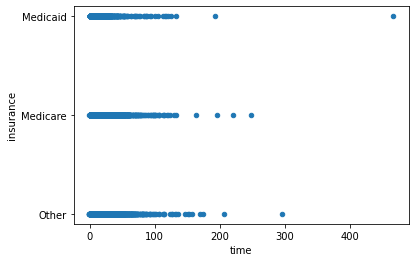

In [5]:
filtered_df.plot.scatter(y="insurance", x="time")

<AxesSubplot: xlabel='time', ylabel='ethnicity'>

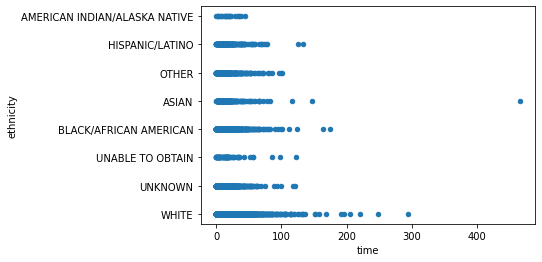

In [6]:
filtered_df.plot.scatter(y="ethnicity", x="time")

<AxesSubplot: xlabel='time', ylabel='ethnicity'>

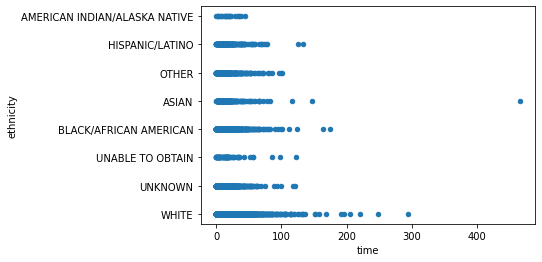

In [7]:
filtered_df.plot.scatter(y="ethnicity", x="time")

<AxesSubplot: xlabel='time', ylabel='admission_location'>

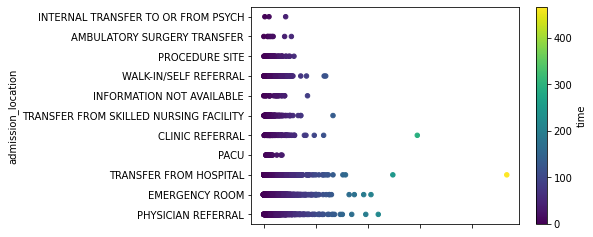

In [8]:
filtered_df.plot.scatter(y="admission_location", x="time", c="time", colormap="viridis")

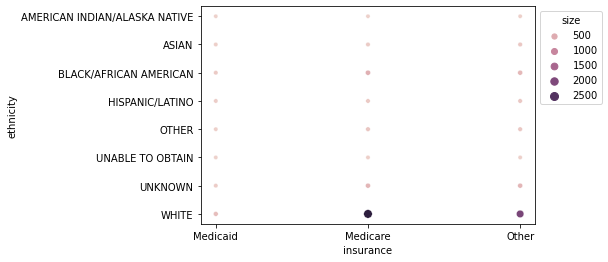

In [9]:
counts = filtered_df.groupby(by=['insurance', 'ethnicity']).size().to_frame('size').reset_index()
ax = sns.scatterplot(data=counts, x="insurance", y="ethnicity", hue="size", size="size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<AxesSubplot: xlabel='time', ylabel='admission_type'>

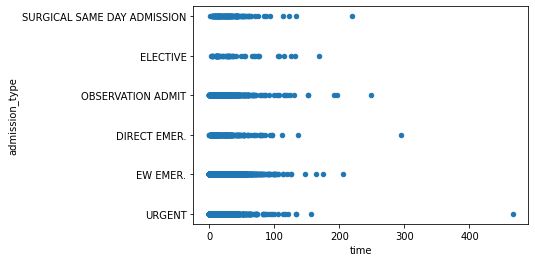

In [10]:
filtered_df.plot.scatter(x="time", y="admission_type")

In [11]:
joined = filtered_df.join(patients,lsuffix='_caller', rsuffix='_other')
joined = joined[joined["anchor_age"] > 0]
len(joined)

907

<AxesSubplot: xlabel='anchor_age', ylabel='insurance'>

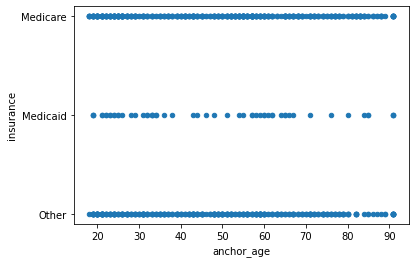

In [12]:
joined.plot.scatter(y="insurance", x="anchor_age")

<AxesSubplot: xlabel='anchor_age', ylabel='time'>

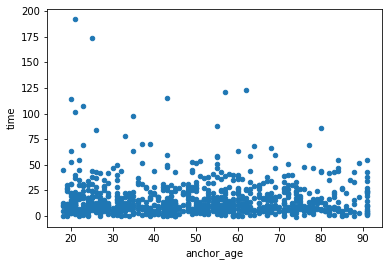

In [13]:
joined.plot.scatter(y="time", x="anchor_age")

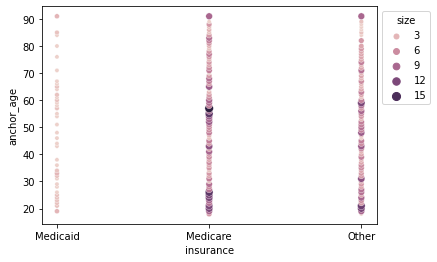

In [14]:
counts = joined.groupby(by=['insurance', 'anchor_age']).size().to_frame('size').reset_index()
ax = sns.scatterplot(data=counts, x="insurance", y="anchor_age", hue="size", size="size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

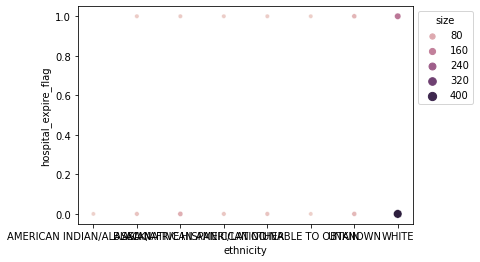

In [35]:
counts = joined.groupby(by=['ethnicity', 'hospital_expire_flag']).size().to_frame('size').reset_index()
ax = sns.scatterplot(data=counts, x="ethnicity", y="hospital_expire_flag", hue="size", size="size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [48]:

fig = px.bar(counts, x='ethnicity', y="hospital_expire_flag")
fig.show()

In [40]:
print(counts)

                        ethnicity  hospital_expire_flag  size
0   AMERICAN INDIAN/ALASKA NATIVE                     0     1
1                           ASIAN                     0    26
2                           ASIAN                     1    12
3          BLACK/AFRICAN AMERICAN                     0    67
4          BLACK/AFRICAN AMERICAN                     1    13
5                 HISPANIC/LATINO                     0    21
6                 HISPANIC/LATINO                     1     9
7                           OTHER                     0    25
8                           OTHER                     1    11
9                UNABLE TO OBTAIN                     0     3
10               UNABLE TO OBTAIN                     1     7
11                        UNKNOWN                     0    47
12                        UNKNOWN                     1    52
13                          WHITE                     0   433
14                          WHITE                     1   180
